In [1]:
import spiceypy

In [2]:
spiceypy.furnsh("../Earth/kernels/lsk/naif0012.tls")
spiceypy.furnsh("../Earth/kernels/pck/pck00010.tpc")
spiceypy.furnsh("../Earth/kernels/spk/de432s.bsp")

In [15]:
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [6]:
init_time_utc=datetime.datetime(year=2000,month=1,day=1,hour=0,minute=0,second=0)

delta_days=10000

end_time_utc=init_time_utc + datetime.timedelta(days=delta_days)




In [11]:
init_time_utc_str=init_time_utc.strftime("%Y-%m-%dT%H:%M:%S")
end_time_utc_str=end_time_utc.strftime("%Y-%m-%dT%H:%M:%S")

In [12]:
print(end_time_utc_str)


2027-05-19T00:00:00


In [13]:
init_time_et=spiceypy.utc2et(init_time_utc_str)
end_time_et=spiceypy.utc2et(end_time_utc_str)

In [19]:
ssb_wrt_sun_position=[]

time_interval_et=np.linspace(init_time_et,end_time_et,delta_days)

print(time_interval_et)

for time_interval_et_f in time_interval_et:
    _position,_=spiceypy.spkgps(targ=0, et=time_interval_et_f,ref="ECLIPJ2000"
                                ,obs=10)
    
    ssb_wrt_sun_position.append(_position)
    
ssb_wrt_sun_position=np.array(ssb_wrt_sun_position)   

ssb_wrt_sun_position 


[-4.31358161e+04  4.32728253e+04  1.29681467e+05 ...  8.63784052e+08
  8.63870461e+08  8.63956869e+08]


array([[1068000.18910616,  417680.94186646,  -30844.65828755],
       [1067195.50173607,  418789.11029741,  -30830.54481228],
       [1066389.55968053,  419896.06924681,  -30816.3999208 ],
       ...,
       [   3311.59737745,  652297.29570213,  -10115.74059094],
       [   2637.32346229,  651683.43230801,  -10099.84964587],
       [   1964.08983546,  651068.8481818 ,  -10083.97281451]])

In [24]:
_,radii_sun=spiceypy.bodvcd(bodyid=10, item="RADII",maxn=3)

radii_sun=radii_sun[0]

ssb_wrt_sun_position_scaled=ssb_wrt_sun_position/radii_sun

In [25]:
ssb_wrt_sun_position_scaled


array([[ 1.53448303,  0.6001163 , -0.04431704],
       [ 1.53332687,  0.60170849, -0.04429676],
       [ 1.53216891,  0.60329895, -0.04427644],
       ...,
       [ 0.00475804,  0.93720876, -0.01453411],
       [ 0.00378926,  0.93632677, -0.01451128],
       [ 0.00282197,  0.93544375, -0.01448847]])

(-2.0, 2.0)

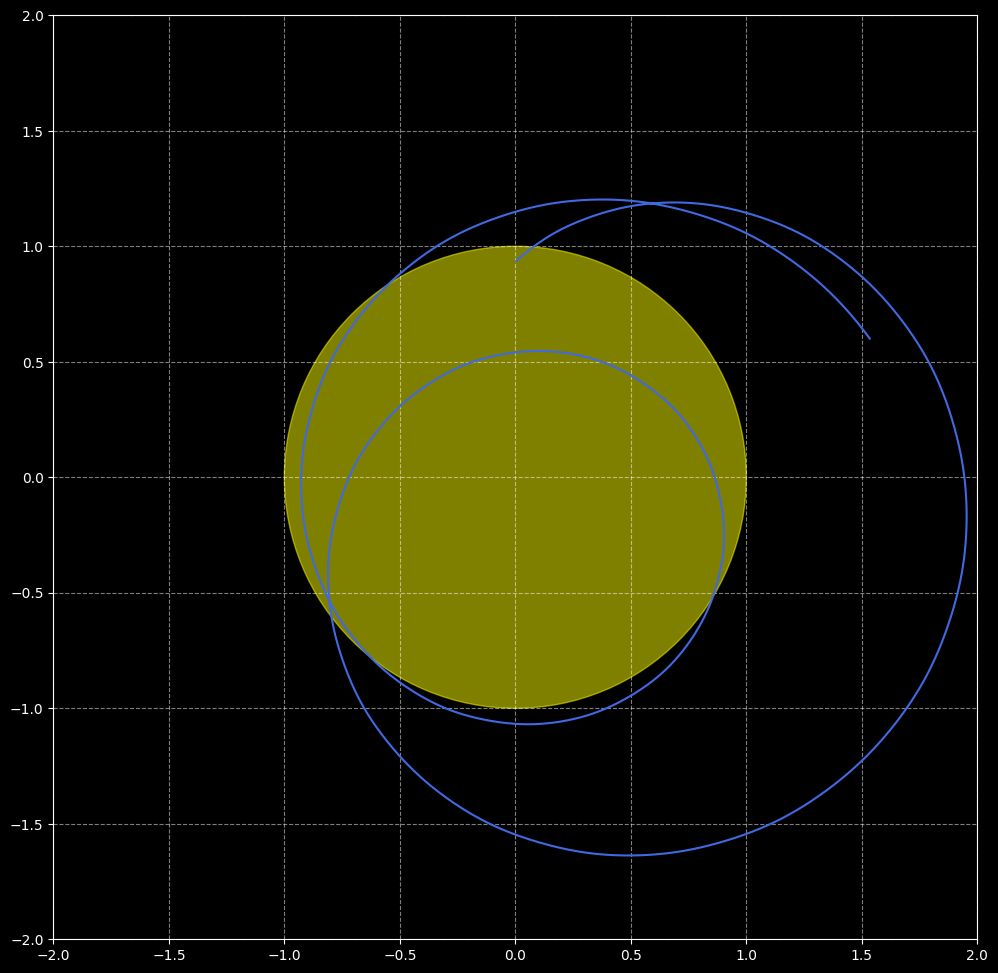

In [33]:
ssb_wrt_sun_position_scaled_xy=ssb_wrt_sun_position_scaled[:,0:2]
plt.style.use("dark_background")

fig, ax=plt.subplots(figsize=(12,12))

sun_circ=plt.Circle((0.0,0.0,0.0),1.0,color='yellow',alpha=0.5)

ax.add_artist(sun_circ)

ax.plot(ssb_wrt_sun_position_scaled_xy[:,0],
        ssb_wrt_sun_position_scaled_xy[:,1],
        ls="solid", color="royalblue")

ax.set_aspect("equal")
ax.grid(True, linestyle="dashed", alpha=0.5 )

ax.set_xlim(-2,2)

ax.set_ylim(-2,2)







In [42]:
ssb_wrt_sun_distance_scaled=np.linalg.norm(ssb_wrt_sun_position_scaled,axis=1)

ssb_outside_sun_delta_days=len(np.where(ssb_wrt_sun_distance_scaled>1)[0])

In [43]:
ssb_outside_sun_delta_days

6464